<a href="https://colab.research.google.com/github/TravisJRCain/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/Travis_Cain_LS_DS14_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Read New York City property sales data
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

In [0]:
### Using PyBaseball data ###

Your code starts here:

In [5]:
pip install pybaseball

  Created wheel for pybaseball: filename=pybaseball-1.0.8-cp36-none-any.whl size=36008 sha256=a9b31173449f0ff63142fd20c293eb985f736911f62ddab5a5979db7cd110fa7
  Stored in directory: /root/.cache/pip/wheels/d5/7b/fb/b1f8a38eb135628a747627977fd18d13ce2c210cffa08ee5a5
Successfully built pybaseball


In [6]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pybaseball import batting_stats
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = batting_stats(2012, 2019, league='all')
df.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,...,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,...,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,...,-9.6,-5.2,9.3,5.4,3.2,NaN,NaN,5.8,1.1,NaN,9.5,0.0,1.0,7.0,5.4,0.6,NaN,NaN,11.5,15.1,NaN,6.31,0.23,0.49,0.63,3.68,1.66,NaN,NaN,2.11,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,...,-7.0,-5.4,9.3,5.2,3.3,NaN,NaN,5.7,1.1,NaN,12.8,0.1,-2.0,14.0,5.2,3.2,NaN,NaN,12.9,-4.9,NaN,6.48,3.76,-0.69,1.76,2.30,12.98,NaN,NaN,2.15,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,...,NaN,-6.2,9.0,5.2,2.3,NaN,NaN,5.0,0.8,12.2,9.5,NaN,3.5,21.4,5.2,0.7,NaN,NaN,11.3,10.6,-0.1,5.81,NaN,1.65,1.92,2.57,2.83,NaN,NaN,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3


In [35]:
df.shape

(7726, 287)

In [0]:
# Look at amount of Line Drives

line_drives = df['LD']

In [11]:
line_drives.value_counts()

0.0      1760
1.0       659
2.0       333
3.0       274
4.0       200
         ... 
133.0       1
155.0       1
159.0       1
157.0       1
131.0       1
Name: LD, Length: 149, dtype: int64

In [12]:
line_drives.value_counts(normalize=True)

0.0      0.227802
1.0      0.085296
2.0      0.043101
3.0      0.035465
4.0      0.025887
           ...   
133.0    0.000129
155.0    0.000129
159.0    0.000129
157.0    0.000129
131.0    0.000129
Name: LD, Length: 149, dtype: float64

In [13]:
# If we were to predict how many line drives would happen per year out of any player
# Average amount of line drives per season = 27

line_drives.mean()

27.513331607558893

In [0]:
train = df[df['Season'] <= 2015.0]
val = df[df['Season'] == 2016.0]
test = df[df['Season'] >= 2017.0]

In [15]:
train.shape, val.shape, test.shape

((3820, 287), (969, 287), (2937, 287))

In [0]:
# Use LD, wRC+, and OPS to predict WAR

features = ['LD', 'wRC+', 'OPS']
target = 'WAR'

In [42]:
train[target].value_counts(normalize=True)

 0.0    0.231675
-0.1    0.113613
 0.1    0.067016
-0.2    0.054450
-0.3    0.038743
          ...   
 8.7    0.000262
 7.7    0.000262
 8.1    0.000262
 7.4    0.000262
 7.0    0.000262
Name: WAR, Length: 108, dtype: float64

In [0]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

In [44]:
pip install category_encoders

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Random Forest
%%time


pipeline = make_pipeline(
    ce.TargetEncoder(), 
    RandomForestRegressor(random_state=42)
)

pipeline.fit(X_train, y_train)
print ('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7595307625587134
CPU times: user 746 ms, sys: 7.94 ms, total: 754 ms
Wall time: 754 ms


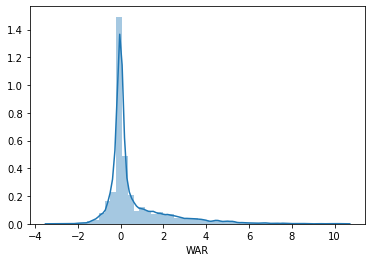

In [50]:
import seaborn as sns
sns.distplot(df['WAR']);

In [51]:
df.fillna(0)

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,...,0.0,-6.2,9.0,4.9,2.1,0.0,0.0,5.3,0.6,0.0,10.2,0.0,0.4,19.6,4.6,4.0,0.0,0.0,20.3,10.1,0.0,3.62,0.00,0.23,1.96,3.87,6.68,0.00,0.0,4.98,1.93,0.00,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,...,-13.3,-5.6,9.7,5.4,2.8,0.8,0.0,6.2,1.1,0.0,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,0.0,27.2,4.9,0.0,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,0.0,4.67,1.06,0.00,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,...,-9.6,-5.2,9.3,5.4,3.2,0.0,0.0,5.8,1.1,0.0,9.5,0.0,1.0,7.0,5.4,0.6,0.0,0.0,11.5,15.1,0.0,6.31,0.23,0.49,0.63,3.68,1.66,0.00,0.0,2.11,3.91,0.00,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,...,-7.0,-5.4,9.3,5.2,3.3,0.0,0.0,5.7,1.1,0.0,12.8,0.1,-2.0,14.0,5.2,3.2,0.0,0.0,12.9,-4.9,0.0,6.48,3.76,-0.69,1.76,2.30,12.98,0.00,0.0,2.15,-1.11,0.00,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,...,0.0,-6.2,9.0,5.2,2.3,0.0,0.0,5.0,0.8,12.2,9.5,0.0,3.5,21.4,5.2,0.7,0.0,0.0,11.3,10.6,-0.1,5.81,0.00,1.65,1.92,2.57,2.83,0.00,0.0,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,2014.0,Michael Choice,Rangers,24.0,86.0,253.0,280.0,46.0,30.0,6.0,1.0,9.0,20.0,36.0,21.0,0.0,69.0,3.0,3.0,0.0,11.0,1.0,0.0,0.182,93.0,69.0,25.0,10.0,1078.0,384.0,694.0,4.0,0.0,0.0,0.075,0.246,0.30,0.250,0.320,0.570,...,0.0,-5.2,9.8,4.7,3.9,1.4,0.0,5.3,1.0,0.0,0.2,0.0,-0.4,-2.8,0.8,-0.4,-0.2,0.0,-7.2,-3.0,0.0,0.21,0.00,-0.42,-0.73,1.32,-1.87,-1.04,0.0,-2.92,-2.10,0.00,0.295,0.536,0.416,0.620,0.862,0.776,0.502,21.5
4563,2013.0,Rob Brantly,Marlins,23.0,67.0,223.0,243.0,47.0,37.0,9.0,0.0,1.0,11.0,18.0,15.0,1.0,53.0,2.0,3.0,0.0,8.0,0.0,0.0,0.211,83.0,55.0,33.0,5.0,854.0,310.0,544.0,4.0,2.0,0.0,0.062,0.218,0.28,0.263,0.265,0.528,...,-4.3,-5.9,9.0,5.6,2.9,0.0,0.0,6.3,1.7,0.0,-2.4,0.0,-3.7,-0.4,0.6,-3.1,0.0,0.0,-4.5,-3.5,0.0,-2.02,3.57,-4.61,-0.13,1.40,-6.62,0.00,0.0,-2.71,-3.10,0.00,0.306,0.633,0.467,0.470,0.921,0.771,0.493,22.5
5212,2019.0,Jeff Mathis,Rangers,36.0,88.0,228.0,244.0,36.0,25.0,9.0,0.0,2.0,17.0,12.0,15.0,1.0,87.0,0.0,1.0,0.0,2.0,1.0,0.0,0.158,55

In [0]:
### Predict an outcome ###

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred = model.predict(X_train)
y_pred

array([2.92922571, 2.61097894, 2.99252388, ..., 0.52935716, 0.7366472 ,
       1.20748643])

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [0]:
mse = mean_squared_error(train[target], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(train[target], y_pred)
r2 = r2_score(train[target], y_pred)

In [62]:
print(f'RMSE of the Training Data: {rmse}')

RMSE of the Training Data: 1.0351853550869627


In [63]:
print(f'MAE of the Training Data: {mae}')

MAE of the Training Data: 0.6485847130974012


In [64]:
print(f'R2 of the Training Data: {r2}')

R2 of the Training Data: 0.49572478090473426
